In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
customer_churn=pd.read_csv('customer_churn.csv')
display(customer_churn.head())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
customer_churn.shape

(7043, 21)

In [12]:
cols = []
for colname in customer_churn.columns:
    cols.append(colname.lower().replace(' ','_'))

customer_churn.columns = cols

display(customer_churn.head())

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
customer_churn['churn'].value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [36]:
customer_churn_num =customer_churn._get_numeric_data()

customer_churn_num.head()

,seniorcitizen,tenure,monthlycharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [21]:
customer_churn_cat =customer_churn.select_dtypes(object)
customer_churn_cat.head()

,customerid,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,totalcharges,churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [14]:
customer_churn.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [38]:
customer_churn['churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: churn, dtype: int64

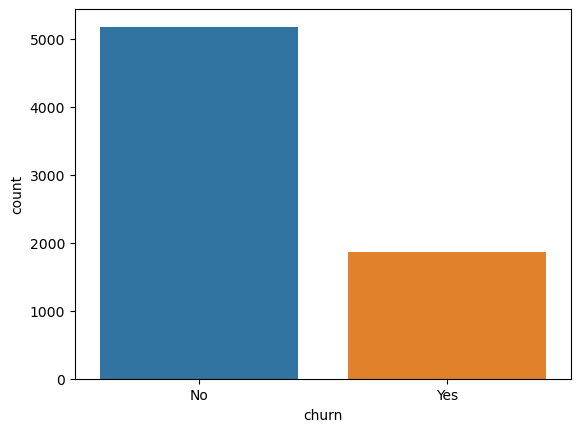

In [24]:
sns.countplot(x='churn', data=customer_churn);
plt.show()

In [26]:
# X/y split
X = customer_churn.drop('churn',axis = 1)
y = customer_churn['churn']

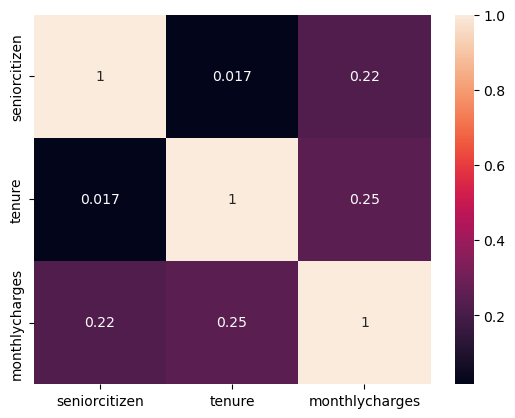

In [27]:
correlations_matrix = X.corr()
#sns.heatmap(correlations_matrix)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [28]:
# here we start scaling, so need to do train-test-split before
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [45]:
y_train.isna().sum()
y_test.isna().sum()

0

In [46]:
X_train_num = X_train.select_dtypes(include = np.number)

In [47]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [50]:
# all features are numeric, so no need to split into _num and _cat. Transformer = scaler(Standard scaler)
transformer = StandardScaler()
transformer.fit(X_train_num)
X_train_num = X_train.select_dtypes(include = np.number)
X_train_scaled_np = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train_num.columns, index=X_train_num.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_num = X_test.select_dtypes(include = np.number)
X_test_scaled_np = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test_num.columns, index=X_test_num.index)
X_train_scaled.head()

,seniorcitizen,tenure,monthlycharges
3296,-0.435476,-0.340191,-0.514314
6397,2.296336,0.883210,0.017840
6043,-0.435476,-1.196572,-0.819594
5309,-0.435476,1.168670,-1.483535
3000,-0.435476,-0.829552,0.658427


In [51]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: churn, dtype: object

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')  #solver is one of the sstragies 
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [53]:
lr.predict(X_train_scaled)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [54]:
lr.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [55]:
lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1] 

1.0

In [56]:
lr.predict_proba(X_train_scaled)[0,0] 

0.8305575731082594

In [58]:
lr.predict_proba(X_train_scaled)[0,1]

0.16944242689174058

In [59]:
lr.predict_proba(X_train_scaled).sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [60]:
lr.predict_proba(X_train_scaled).shape

(5282, 2)

In [62]:
lr.predict_proba(X_train_scaled)[:5,1]

array([0.16944243, 0.11040852, 0.33441811, 0.01003362, 0.54724002])

In [63]:
lr.predict_proba(X_train_scaled)[:5,0]

array([0.83055757, 0.88959148, 0.66558189, 0.98996638, 0.45275998])

In [64]:
lr.predict(X_train_scaled)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [65]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

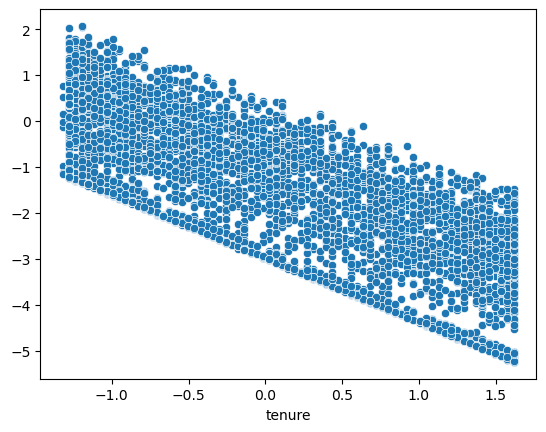

In [67]:
sns.scatterplot(y = logits,x = X_train_scaled['tenure']); # checking linear relationship
plt.show()

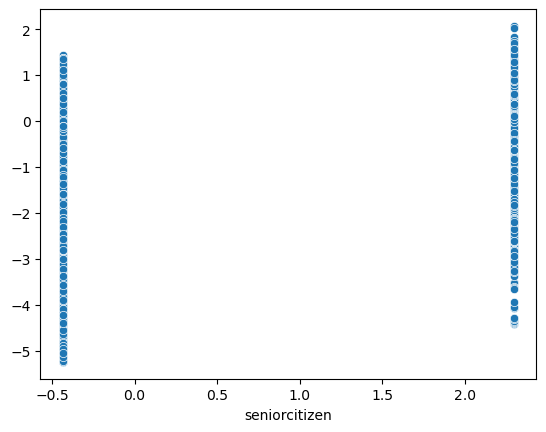

In [69]:
sns.scatterplot(y = logits,x = X_train_scaled['seniorcitizen']); # checking linear relationship
plt.show()

In [ ]:
sns.scatterplot(y = logits,x = X_train_scaled['seniorcitizen']); # checking linear relationship
plt.show()

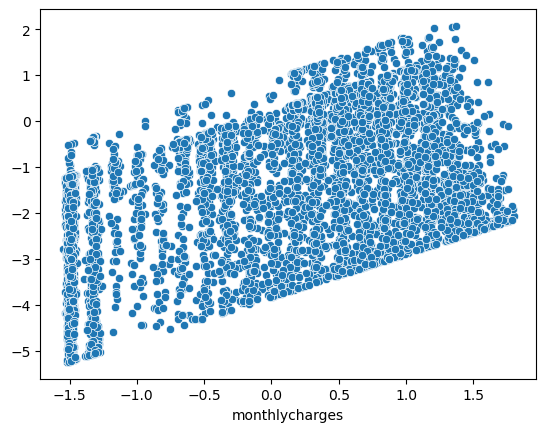

In [70]:
sns.scatterplot(y = logits,x = X_train_scaled['monthlycharges']); # checking linear relationship
plt.show()

No     5174
Yes    1869
Name: churn, dtype: int64


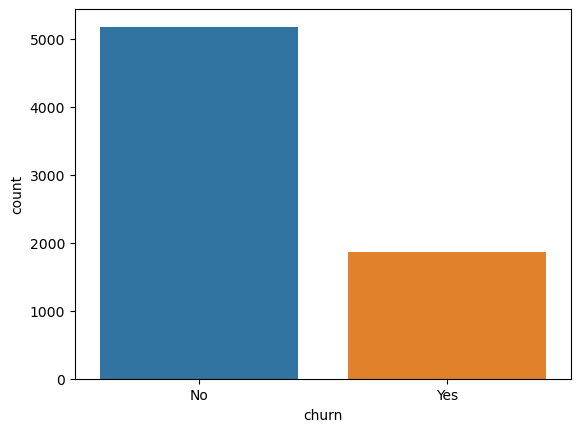

In [71]:
count_classes = customer_churn['churn'].value_counts()
print(count_classes)
sns.countplot(x = 'churn', data = customer_churn);
plt.show()

In [78]:
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.47


In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test))) 

The accuracy of the model in the TEST set is: 0.78


In [81]:
#while accuracy is not absolutely terrible, a closer look reveals some serious problems
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label="Yes")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label="Yes")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label="Yes")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.78
The precision in the TEST set is: 0.61
The recall in the TEST set is: 0.46
The F1 in the TEST set is: 0.52
The Kappa in the TEST set is: 0.38


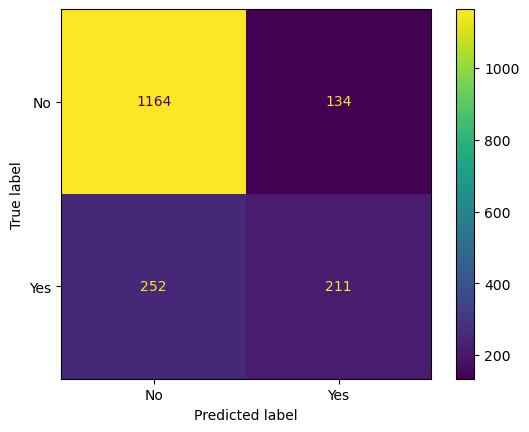

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [83]:
y_train[y_train == 0]

Series([], Name: churn, dtype: object)

In [84]:
majority_indexes = y_train[y_train == 0].index       #Mejority class row index
minority_indexes = y_train[y_train == 1].index

In [85]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

In [88]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 

In [89]:
# separate majority/minority classes  # upsampling
ros = RandomOverSampler(random_state=42) #oversampling same random 

X_train_over, y_train_over = ros.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_over,y_train_over],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_over))
print(y_train_over.value_counts())

,seniorcitizen,tenure,monthlycharges,churn
0,-0.435476,-0.340191,-0.514314,No
1,2.296336,0.883210,0.017840,No
2,-0.435476,-1.196572,-0.819594,Yes
3,-0.435476,1.168670,-1.483535,No
4,-0.435476,-0.829552,0.658427,Yes


Resampled dataset shape Counter({'No': 3876, 'Yes': 3876})
No     3876
Yes    3876
Name: churn, dtype: int64


In [90]:
# Our Logistic Regression, while still not amazing, has improved substantially!
# especially at detecting instances of diabetes
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_over, y_train_over)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label="Yes")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label="Yes")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label="Yes")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.37


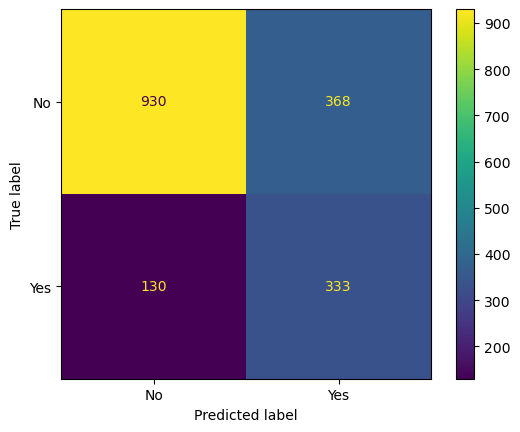

In [91]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [92]:
from imblearn.under_sampling import RandomUnderSampler

In [93]:
y_train[y_train == 1].shape

(0,)

In [94]:
rus = RandomUnderSampler(random_state=42)

X_train_under, y_train_under = rus.fit_resample(X_train_scaled, y_train)
display(pd.concat([X_train_under,y_train_under],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_under))# counter or value.count()

,seniorcitizen,tenure,monthlycharges,churn
0,-0.435476,0.842430,0.313111,No
1,-0.435476,0.720089,1.499197,No
2,-0.435476,1.046330,-0.646101,No
3,-0.435476,-1.074232,-1.478531,No
4,-0.435476,-0.584871,-1.488540,No


Resampled dataset shape Counter({'No': 1406, 'Yes': 1406})


In [95]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_under, y_train_under)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label="Yes")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label="Yes")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label="Yes")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.47
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.37


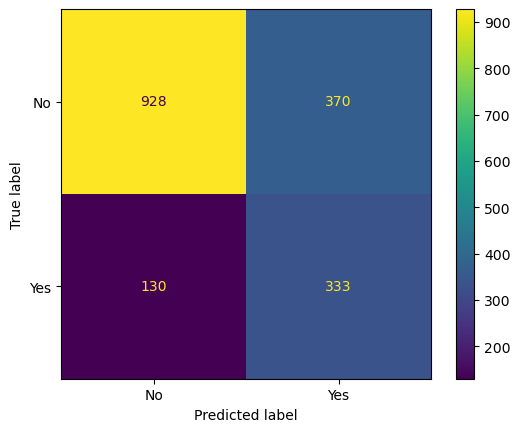

In [96]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

# SMOTE

In [98]:
from imblearn.over_sampling import SMOTE

In [99]:
# a bit of magic, you can find documentation here: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html
# by deafult, takes a 5-neighbour KNN to build a new point, experimenting led us to choose 3 here
sm = SMOTE(random_state=100,k_neighbors=3)  # fake class neighbor 

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [100]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 20)
(7752, 3)


In [101]:
y_train_SMOTE.value_counts()

No     3876
Yes    3876
Name: churn, dtype: int64

In [104]:
# yet another small improvement, but bear in mind that we saved 12 hypothetical people with
# these "small improvements"
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label="Yes")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label="Yes")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label="Yes")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The precision in the TEST set is: 0.48
The recall in the TEST set is: 0.72
The F1 in the TEST set is: 0.57
The Kappa in the TEST set is: 0.38


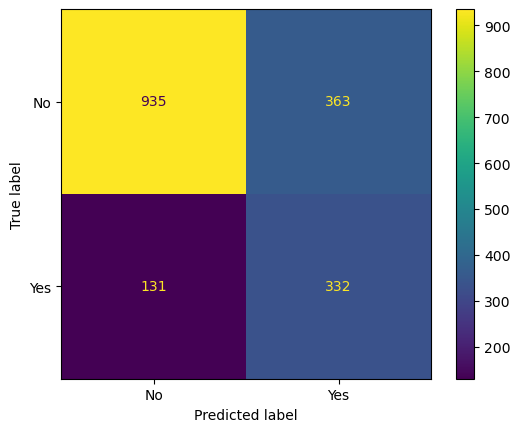

In [105]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [106]:
from imblearn.under_sampling import TomekLinks 

In [107]:
tl = TomekLinks()

X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)

display(pd.concat([X_train_tl,y_train_tl],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_tl))

,seniorcitizen,tenure,monthlycharges,churn
0,-0.435476,-0.340191,-0.514314,No
1,2.296336,0.883210,0.017840,No
2,-0.435476,-1.196572,-0.819594,Yes
3,-0.435476,1.168670,-1.483535,No
4,-0.435476,-0.829552,0.658427,Yes


Resampled dataset shape Counter({'No': 3516, 'Yes': 1406})


In [109]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000) #trainnig the model 
lr.fit(X_train_tl, y_train_tl) #processing
y_pred_test = lr.predict(X_test_scaled)                                                                             
    #evaluating the model
print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred_test, pos_label="Yes")))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred_test, pos_label="Yes")))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred_test, pos_label="Yes")))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.77
The precision in the TEST set is: 0.56
The recall in the TEST set is: 0.52
The F1 in the TEST set is: 0.54
The Kappa in the TEST set is: 0.38


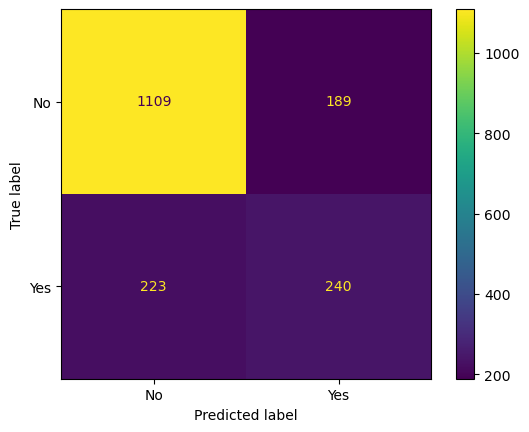

In [110]:
cm_test = confusion_matrix(y_test,y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=lr.classes_)
disp.plot()
plt.show()

In [111]:
list(zip(list(X_test.columns), list(np.abs(lr.coef_)[0])))

[('customerid', 0.3001241541564659),
 ('gender', 1.5166866820235665),
 ('seniorcitizen', 1.0570014713173241)]

In [112]:
list(zip(list(X_test.columns), list(lr.coef_[0])))

[('customerid', 0.3001241541564659),
 ('gender', -1.5166866820235665),
 ('seniorcitizen', 1.0570014713173241)]